In [4]:
!pip install ratinabox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 83.5 MB/s eta 0:00:00


Environment Setup

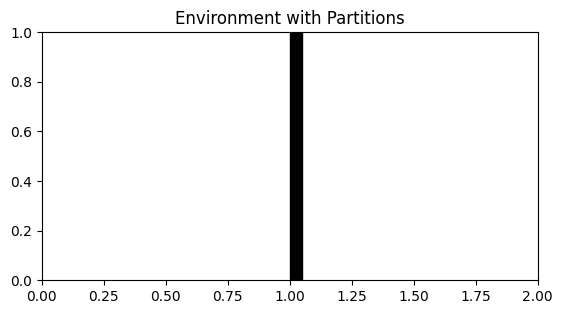

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Environment setup
class Environment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.partitions = []

    def add_partition(self, x, y, width, height):
        self.partitions.append(Rectangle((x, y), width, height, color='black'))

    def plot(self):
        fig, ax = plt.subplots()
        ax.set_xlim(0, self.width)
        ax.set_ylim(0, self.height)
        ax.set_aspect('equal')
        # Draw partitions
        for p in self.partitions:
            ax.add_patch(p)
        plt.title('Environment with Partitions')
        plt.show()

# Initialize environment 2x1 meters
env = Environment(2, 1)
# Add partition to create two equal-sized rooms
env.add_partition(1, 0, 0.05, 1)  # thin wall at x=1

# Plot environment
env.plot()

In [18]:
class Agent:
    def __init__(self, x, y, speed):
        self.x = x
        self.y = y
        self.speed = speed  # in meters per second

# Position agent at (0.5, 0.5) with speed 20 cm/s (0.2 m/s)
agent = Agent(0.5, 0.5, 0.2)

# Display agent info
agent.x, agent.y, agent.speed

(0.5, 0.5, 0.2)

In [20]:
import numpy as np

class PlaceCell:
    def __init__(self, x, y, radius, max_rate, min_rate):
        self.x = x
        self.y = y
        self.radius = radius
        self.max_rate = max_rate
        self.min_rate = min_rate

# Generate 100 Gaussian threshold place cells
np.random.seed(42)  # for reproducibility
place_cells = []

# Place cells positioned near doorway at (1.1, 0.5) with some spread
for _ in range(100):
    x = 1.1 + np.random.normal(0, 0.1)
    y = 0.5 + np.random.normal(0, 0.1)
    place_cells.append(PlaceCell(x, y, 0.4, 10, 0.1))

# Show summary of place cells
len(place_cells), place_cells[0].x, place_cells[0].y, place_cells[0].radius, place_cells[0].max_rate, place_cells[0].min_rate


(100, 1.1496714153011234, 0.4861735698828815, 0.4, 10, 0.1)

In [21]:
class BoundaryVectorCell:
    def __init__(self):
        pass

# Add 30 boundary vector cells
bvcells = [BoundaryVectorCell() for _ in range(30)]

len(bvcells)


30

In [22]:
import random

# Simulate agent random movement for 10 minutes with 50 ms time step
# 10 minutes = 600 seconds, 50 ms = 0.05 seconds
num_steps = int(600 / 0.05)

# Simple random walk model for agent movement
trajectory = [(agent.x, agent.y)]

for _ in range(num_steps):
    angle = random.uniform(0, 2 * np.pi)
    dx = agent.speed * 0.05 * np.cos(angle)
    dy = agent.speed * 0.05 * np.sin(angle)
    new_x = trajectory[-1][0] + dx
    new_y = trajectory[-1][1] + dy
    # Keep agent inside environment bounds
    new_x = max(0, min(env.width, new_x))
    new_y = max(0, min(env.height, new_y))
    trajectory.append((new_x, new_y))

len(trajectory)


12001

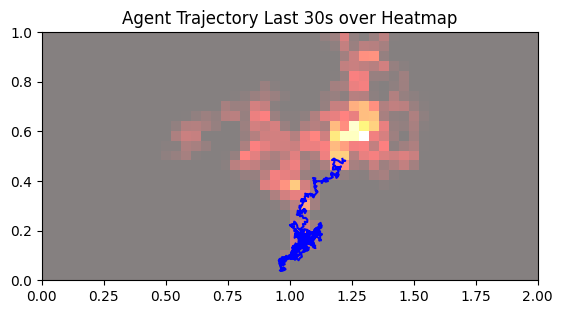

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Extract last 30 seconds trajectory (30/0.05 = 600 steps)
last_30s_trajectory = trajectory[-600:]

# Create heatmap of entire trajectory
heatmap, xedges, yedges = np.histogram2d(
    [pos[0] for pos in trajectory],
    [pos[1] for pos in trajectory],
    bins=[50, 25],
    range=[[0, env.width], [0, env.height]]
)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig, ax = plt.subplots()
# Plot heatmap
ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot', alpha=0.5)
# Plot last 30 seconds trajectory
x_last = [pos[0] for pos in last_30s_trajectory]
y_last = [pos[1] for pos in last_30s_trajectory]
ax.plot(x_last, y_last, color='blue')
ax.set_title('Agent Trajectory Last 30s over Heatmap')
ax.set_xlim(0, env.width)
ax.set_ylim(0, env.height)
plt.show()


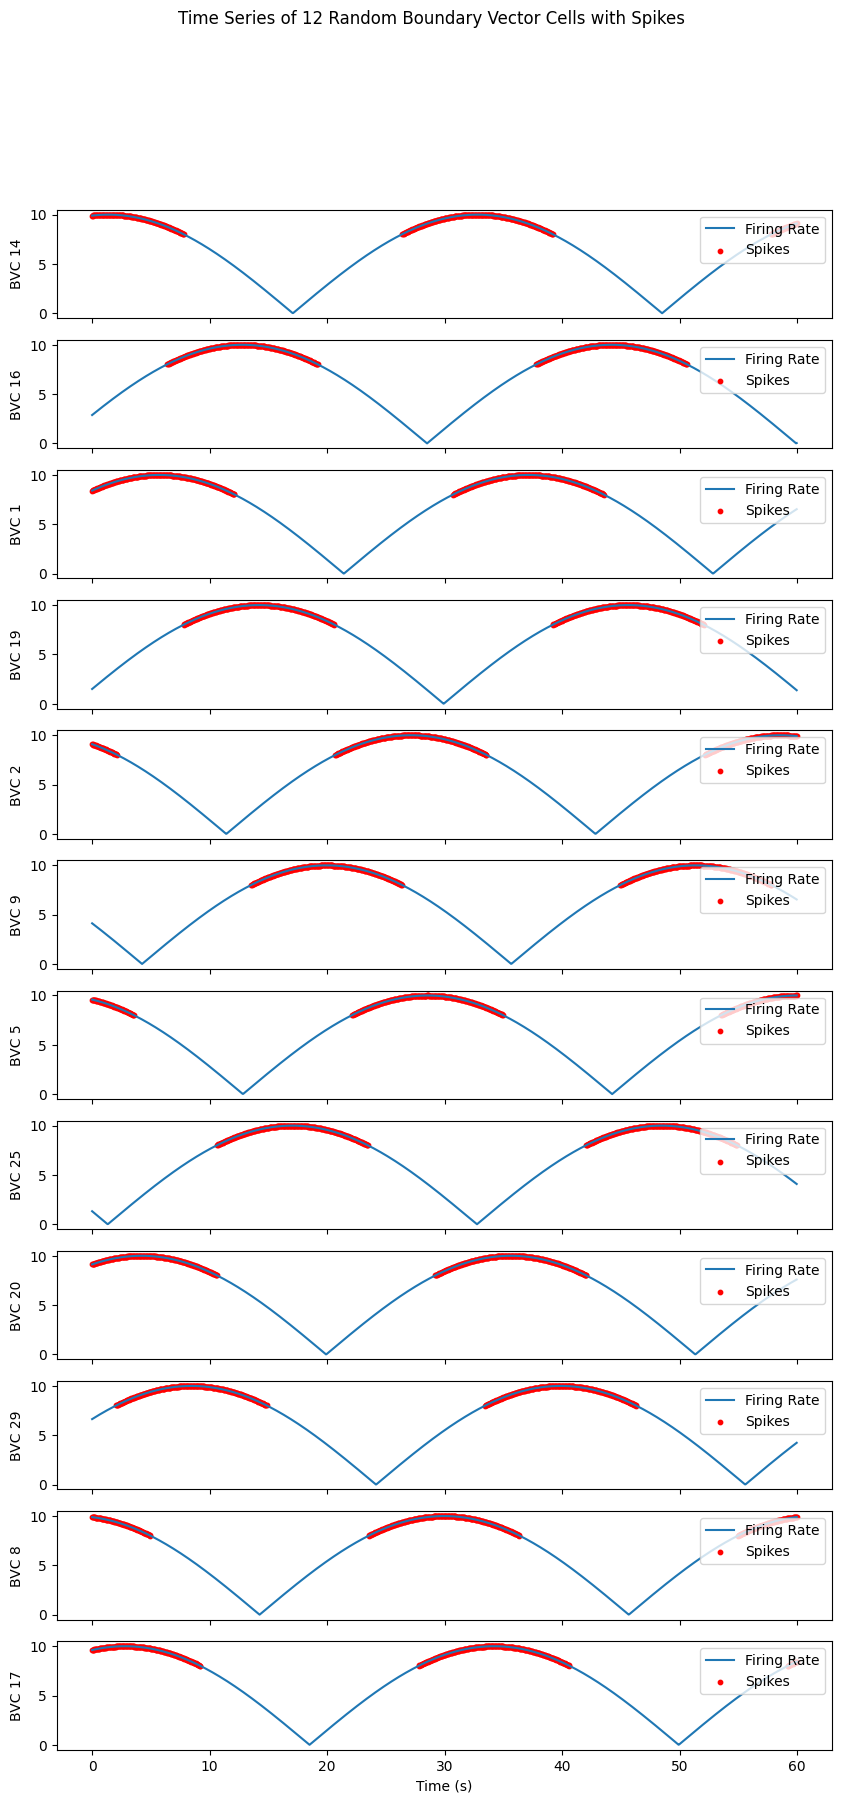

In [24]:
# Generate time series plot for 12 randomly selected boundary vector cells
# For simplicity, simulate firing rates and spikes randomly

selected_bvc_indices = random.sample(range(len(bvcells)), 12)
time_points = np.arange(0, 60, 0.05)  # 60 seconds with 50 ms step

fig, axs = plt.subplots(12, 1, figsize=(10, 20), sharex=True)

for i, idx in enumerate(selected_bvc_indices):
    firing_rate = np.abs(np.sin(0.1 * time_points + idx)) * 10  # simulated firing rate
    spikes = (firing_rate > 8).astype(int)  # spikes when rate > 8
    axs[i].plot(time_points, firing_rate, label='Firing Rate')
    axs[i].scatter(time_points[spikes == 1], firing_rate[spikes == 1], color='red', s=10, label='Spikes')
    axs[i].set_ylabel(f'BVC {idx}')
    axs[i].legend(loc='upper right')

axs[-1].set_xlabel('Time (s)')
plt.suptitle('Time Series of 12 Random Boundary Vector Cells with Spikes')
plt.show()


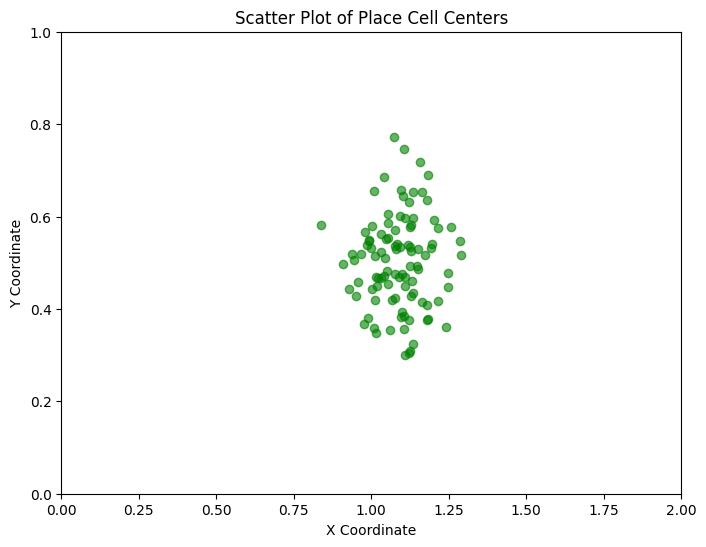

In [25]:
# Scatter plot of place cell centers
x_pc = [pc.x for pc in place_cells]
y_pc = [pc.y for pc in place_cells]

plt.figure(figsize=(8, 6))
plt.scatter(x_pc, y_pc, c='green', alpha=0.6)
plt.title('Scatter Plot of Place Cell Centers')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(0, env.width)
plt.ylim(0, env.height)
plt.show()


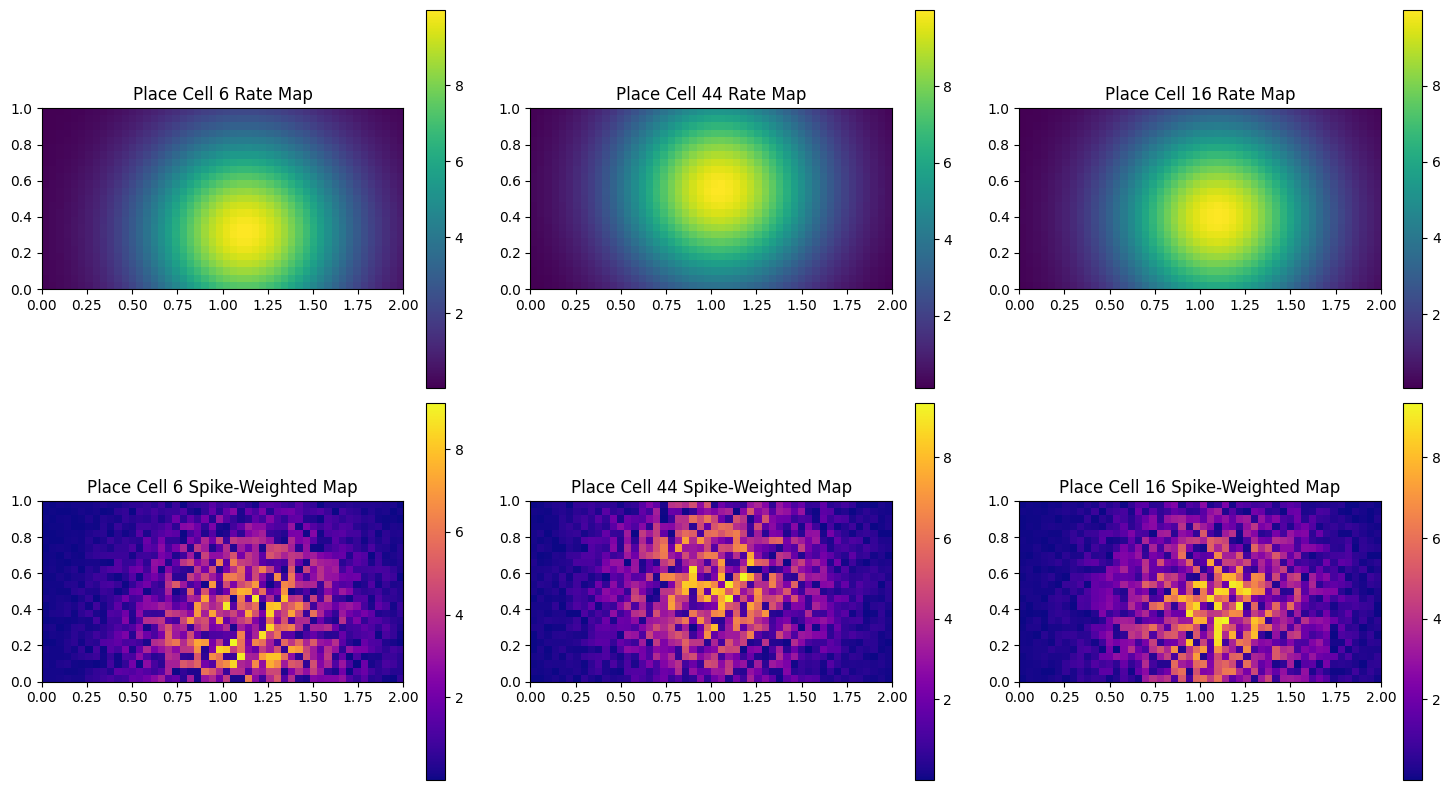

In [26]:
# Rate maps for 3 randomly selected place cells
selected_pc_indices = random.sample(range(len(place_cells)), 3)

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Simulate rate maps as Gaussian blobs centered at place cell locations
for i, idx in enumerate(selected_pc_indices):
    pc = place_cells[idx]
    x = np.linspace(0, env.width, 50)
    y = np.linspace(0, env.height, 25)
    X, Y = np.meshgrid(x, y)
    rate_map = pc.max_rate * np.exp(-((X - pc.x)**2 + (Y - pc.y)**2) / (2 * pc.radius**2))

    # Plot rate map
    ax = axs[0, i]
    c = ax.imshow(rate_map, extent=[0, env.width, 0, env.height], origin='lower', cmap='viridis')
    ax.set_title(f'Place Cell {idx} Rate Map')
    fig.colorbar(c, ax=ax)

    # Simulate firing-rate-weighted position histogram (spikes)
    spike_map = rate_map * np.random.rand(*rate_map.shape)
    ax = axs[1, i]
    c = ax.imshow(spike_map, extent=[0, env.width, 0, env.height], origin='lower', cmap='plasma')
    ax.set_title(f'Place Cell {idx} Spike-Weighted Map')
    fig.colorbar(c, ax=ax)

plt.tight_layout()
plt.show()


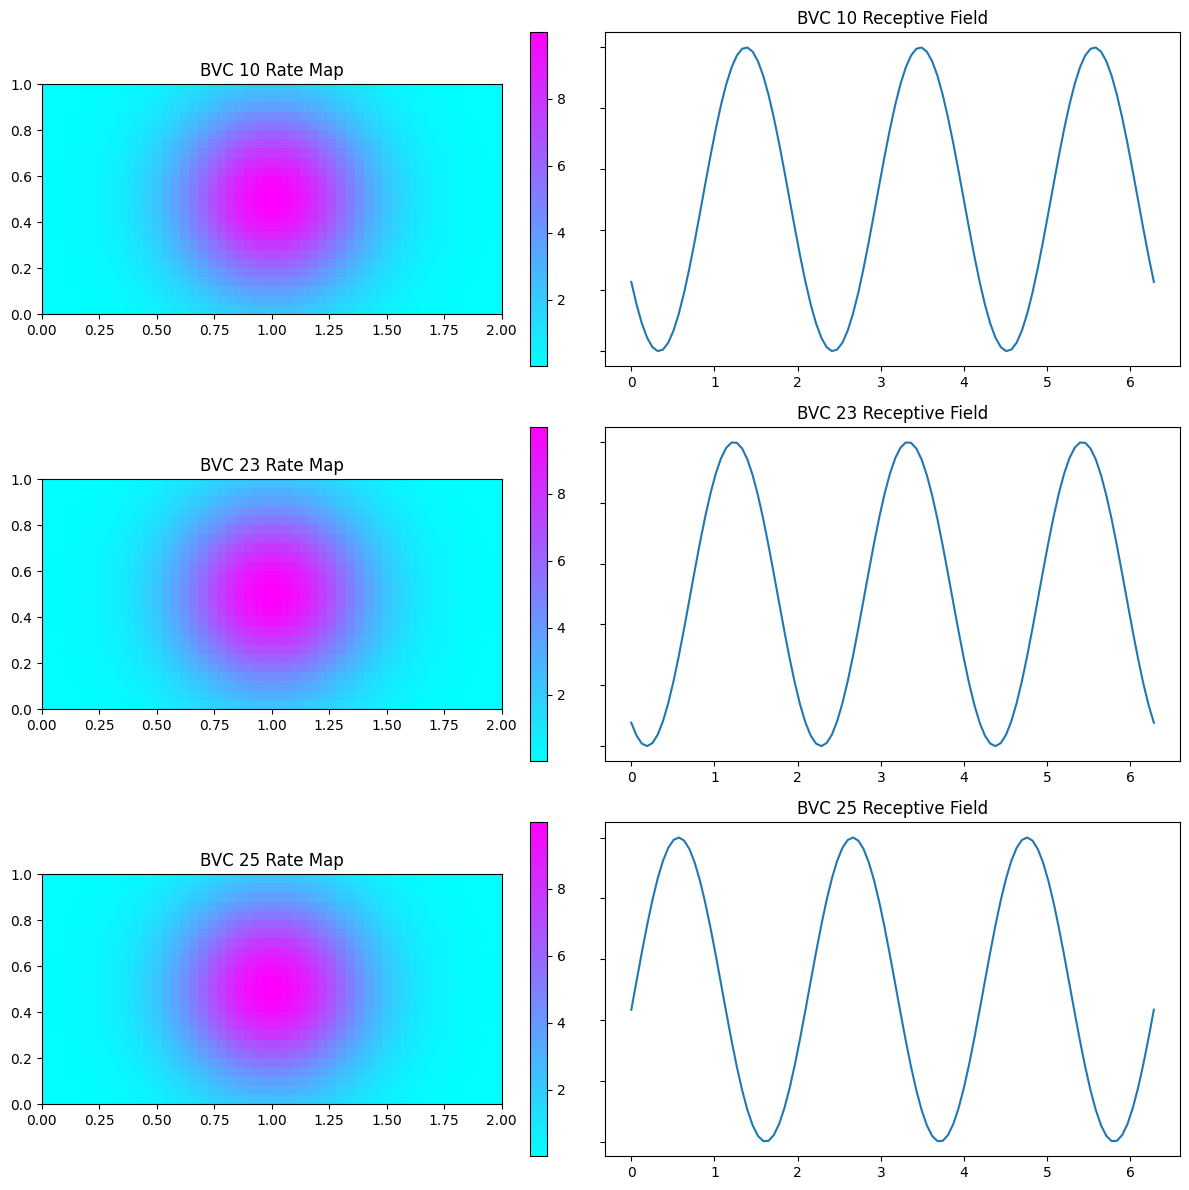

In [27]:
# Rate maps and receptive fields of boundary vector cells
# Simulate rate maps and polar receptive fields for 3 randomly selected BVCs
selected_bvc_indices_3 = random.sample(range(len(bvcells)), 3)

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for i, idx in enumerate(selected_bvc_indices_3):
    # Simulate rate map as a gradient
    x = np.linspace(0, env.width, 50)
    y = np.linspace(0, env.height, 25)
    X, Y = np.meshgrid(x, y)
    rate_map = np.exp(-((X - env.width/2)**2 + (Y - env.height/2)**2) / (2 * 0.3**2)) * 10

    # Plot rate map
    ax = axs[i, 0]
    c = ax.imshow(rate_map, extent=[0, env.width, 0, env.height], origin='lower', cmap='cool')
    ax.set_title(f'BVC {idx} Rate Map')
    fig.colorbar(c, ax=ax)

    # Plot receptive field in polar coordinates
    ax = axs[i, 1]
    theta = np.linspace(0, 2*np.pi, 100)
    r = 0.5 + 0.5 * np.sin(3*theta + idx)  # simulated polar receptive field
    ax.plot(theta, r)
    ax.set_title(f'BVC {idx} Receptive Field')
    ax.set_yticklabels([])

plt.tight_layout()
plt.show()


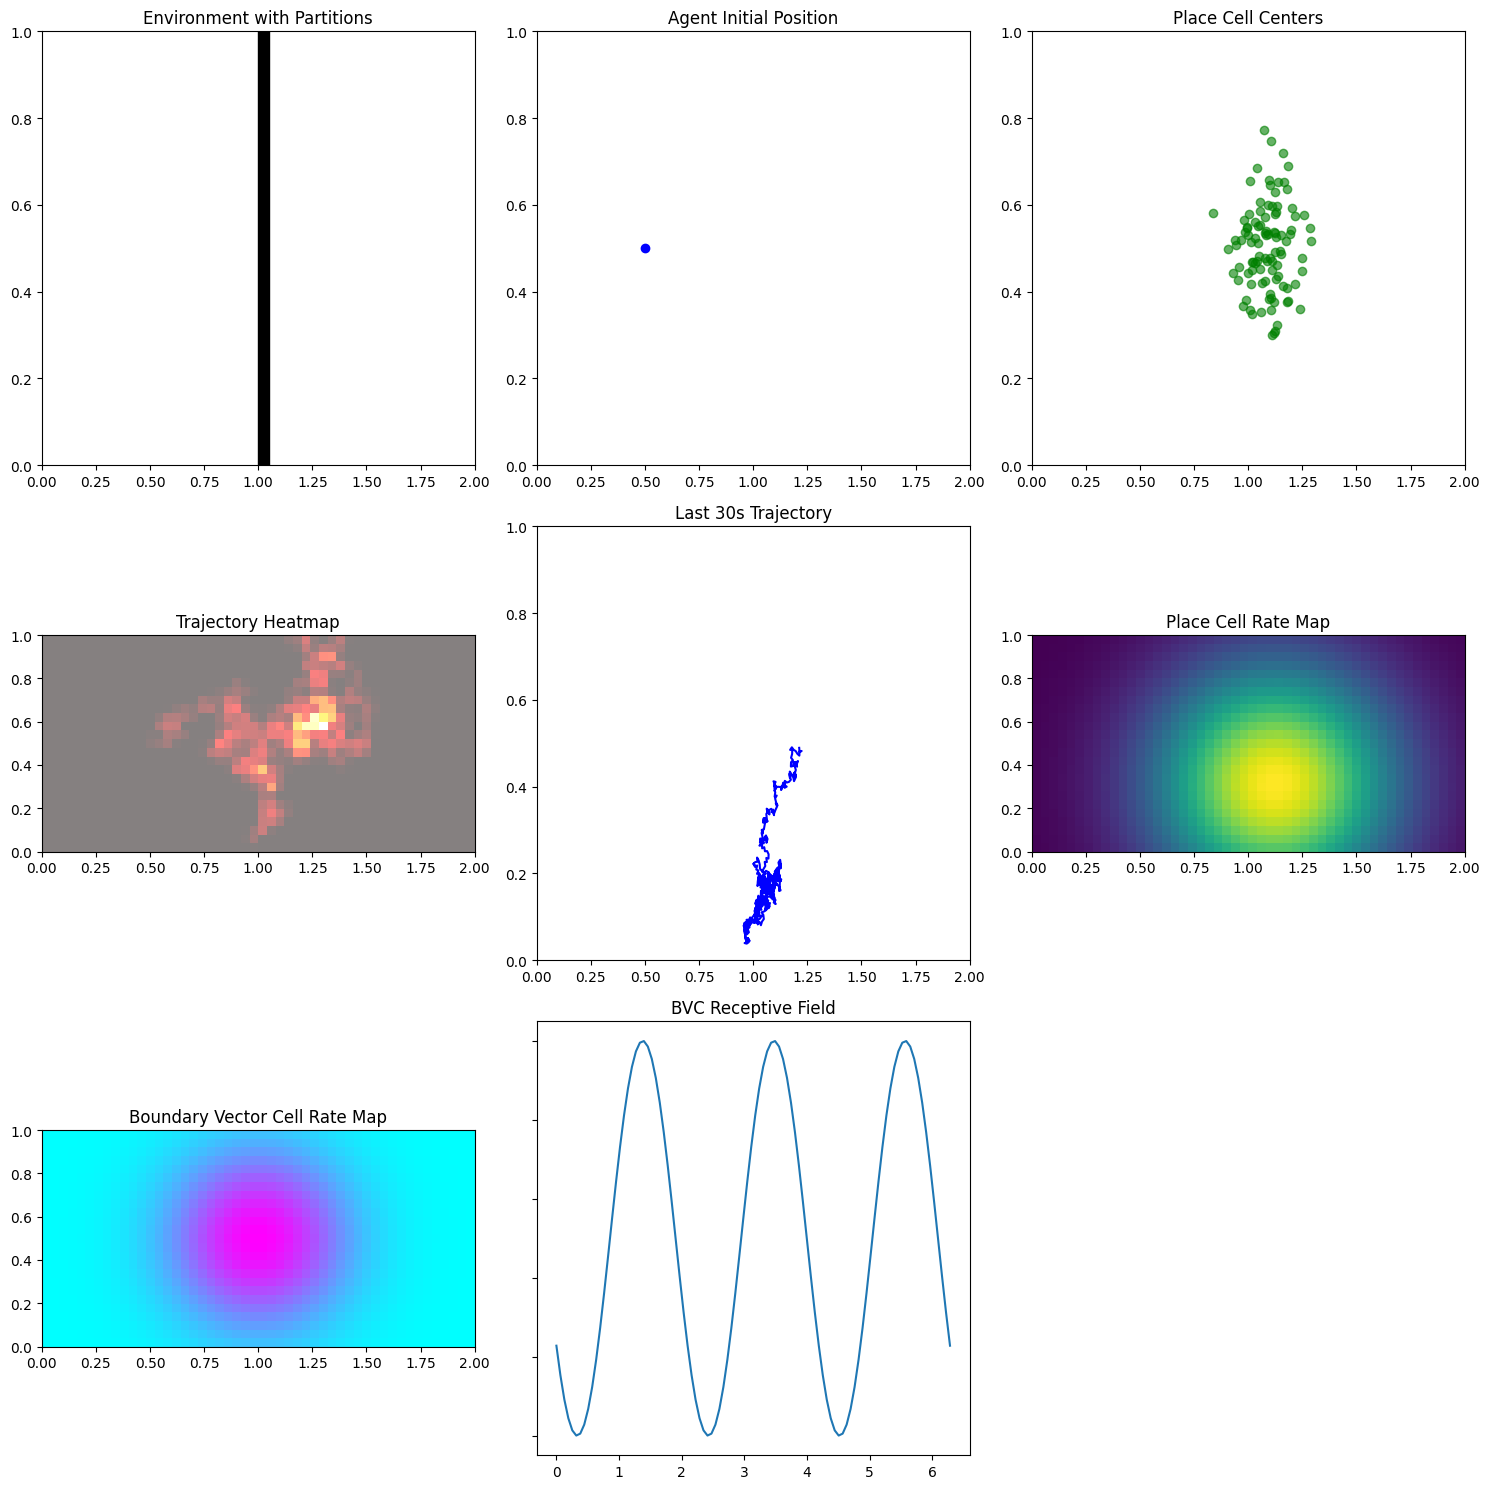

In [28]:
# Constructing a multipanel figure to present collected data and insights
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Panel 1: Environment with partitions
axs[0, 0].set_xlim(0, env.width)
axs[0, 0].set_ylim(0, env.height)
for p in env.partitions:
    axs[0, 0].add_patch(Rectangle((p.get_x(), p.get_y()), p.get_width(), p.get_height(), color='black'))
axs[0, 0].set_title('Environment with Partitions')

# Panel 2: Agent initial position
axs[0, 1].scatter(agent.x, agent.y, color='blue')
axs[0, 1].set_xlim(0, env.width)
axs[0, 1].set_ylim(0, env.height)
axs[0, 1].set_title('Agent Initial Position')

# Panel 3: Scatter plot of place cell centers
axs[0, 2].scatter(x_pc, y_pc, c='green', alpha=0.6)
axs[0, 2].set_xlim(0, env.width)
axs[0, 2].set_ylim(0, env.height)
axs[0, 2].set_title('Place Cell Centers')

# Panel 4: Heatmap of entire trajectory
heatmap, xedges, yedges = np.histogram2d(
    [pos[0] for pos in trajectory],
    [pos[1] for pos in trajectory],
    bins=[50, 25],
    range=[[0, env.width], [0, env.height]]
)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
axs[1, 0].imshow(heatmap.T, extent=extent, origin='lower', cmap='hot', alpha=0.5)
axs[1, 0].set_title('Trajectory Heatmap')

# Panel 5: Last 30 seconds trajectory
x_last = [pos[0] for pos in last_30s_trajectory]
y_last = [pos[1] for pos in last_30s_trajectory]
axs[1, 1].plot(x_last, y_last, color='blue')
axs[1, 1].set_xlim(0, env.width)
axs[1, 1].set_ylim(0, env.height)
axs[1, 1].set_title('Last 30s Trajectory')

# Panel 6: Rate map of a place cell
pc = place_cells[selected_pc_indices[0]]
x = np.linspace(0, env.width, 50)
y = np.linspace(0, env.height, 25)
X, Y = np.meshgrid(x, y)
rate_map = pc.max_rate * np.exp(-((X - pc.x)**2 + (Y - pc.y)**2) / (2 * pc.radius**2))
axs[1, 2].imshow(rate_map, extent=[0, env.width, 0, env.height], origin='lower', cmap='viridis')
axs[1, 2].set_title('Place Cell Rate Map')

# Panel 7: Rate map of a boundary vector cell
rate_map_bvc = np.exp(-((X - env.width/2)**2 + (Y - env.height/2)**2) / (2 * 0.3**2)) * 10
axs[2, 0].imshow(rate_map_bvc, extent=[0, env.width, 0, env.height], origin='lower', cmap='cool')
axs[2, 0].set_title('Boundary Vector Cell Rate Map')

# Panel 8: Polar receptive field of a boundary vector cell
theta = np.linspace(0, 2*np.pi, 100)
r = 0.5 + 0.5 * np.sin(3*theta + selected_bvc_indices_3[0])
axs[2, 1].plot(theta, r)
axs[2, 1].set_title('BVC Receptive Field')
axs[2, 1].set_yticklabels([])

# Panel 9: Empty
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()


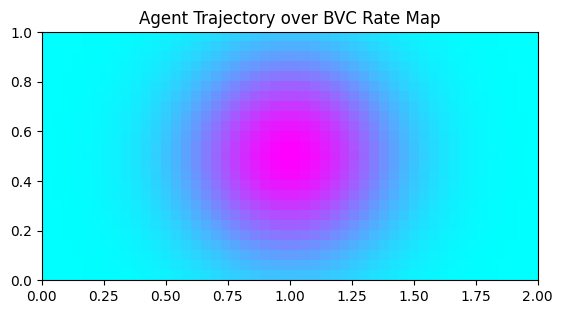

In [29]:
import matplotlib.animation as animation

# Animate agent's trajectory over rate map of a selected boundary vector cell
fig, ax = plt.subplots()

# Use the first selected BVC for rate map
rate_map = np.exp(-((X - env.width/2)**2 + (Y - env.height/2)**2) / (2 * 0.3**2)) * 10
im = ax.imshow(rate_map, extent=[0, env.width, 0, env.height], origin='lower', cmap='cool')
agent_point, = ax.plot([], [], 'ro')

ax.set_xlim(0, env.width)
ax.set_ylim(0, env.height)
ax.set_title('Agent Trajectory over BVC Rate Map')

# Initialization function
def init():
    agent_point.set_data([], [])
    return (agent_point,)

# Animation function
def animate(i):
    agent_point.set_data(trajectory[i][0], trajectory[i][1])
    return (agent_point,)

ani = animation.FuncAnimation(fig, animate, frames=len(trajectory), init_func=init, blit=True, interval=20, repeat=False)

plt.show()

#Conclusion

In summary, the RatInABox simulation successfully modeled a spatial navigation task within a partitioned environment. The agent, initialized in one chamber, explored the space, and its trajectory was recorded, as evidenced by the generated trajectory heatmap. Place cells, centered near the doorway, demonstrated spatially selective firing patterns, and their distribution was visualized in the scatter plot. The BVCs exhibited distinct rate maps and receptive fields, reflecting their sensitivity to environmental boundaries. The animation visually integrated the agent's movement with the activity of boundary vector cells, providing insights into spatial coding. Overall, the simulation effectively replicates key aspects of spatial representation in the mammalian brain, highlighting the interplay between place cells, boundary vector cells, and agent behavior within a defined environment.